<div class="title">Linear Models for Regression</div>
<div class="subtitle">Machine Learning</div>
<div class="author">Carlos María Alaíz Gudín &mdash; Universidad Autónoma de Madrid</div>

---

**Configuration**

This cell defines the general configuration of Jupyter Notebook.

In [1]:
%%html
<head><link rel="stylesheet" href="style.css"></head>

This cell imports the packages to be used.

In [2]:
# Standard packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
import sys

# Custom packages.
from ml import (
	generate_dataset_lr,
	generate_dataset_lr_mv,
	plot_dataset,
	plot_linear_model,
)

# Initialisations.
matplotlib.rc("figure", figsize=(15, 5))
seed = 123
sys.dont_write_bytecode = True

# 1-Dimensional Linear Regression

## First Example

### Dataset

This code generates and plots the dataset.
The underlying (real) model behind the data is linear.

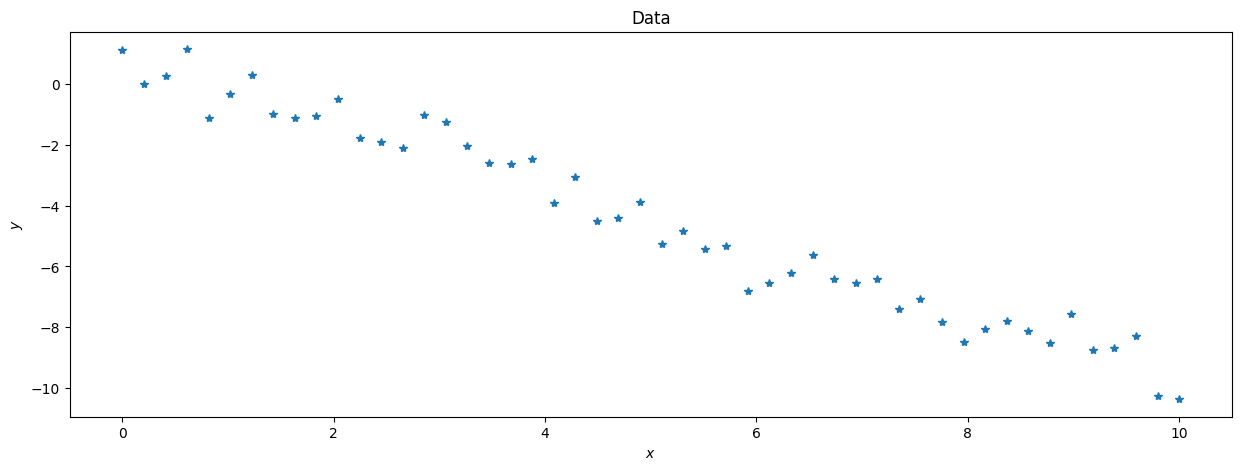

In [3]:
x, y, w, b = generate_dataset_lr(seed)
plot_dataset(x, y)

<div class="qst">

* Can the linearity be distinguished in the plot?

</div>

### Estimation

A first linear model can be fitted by hand.

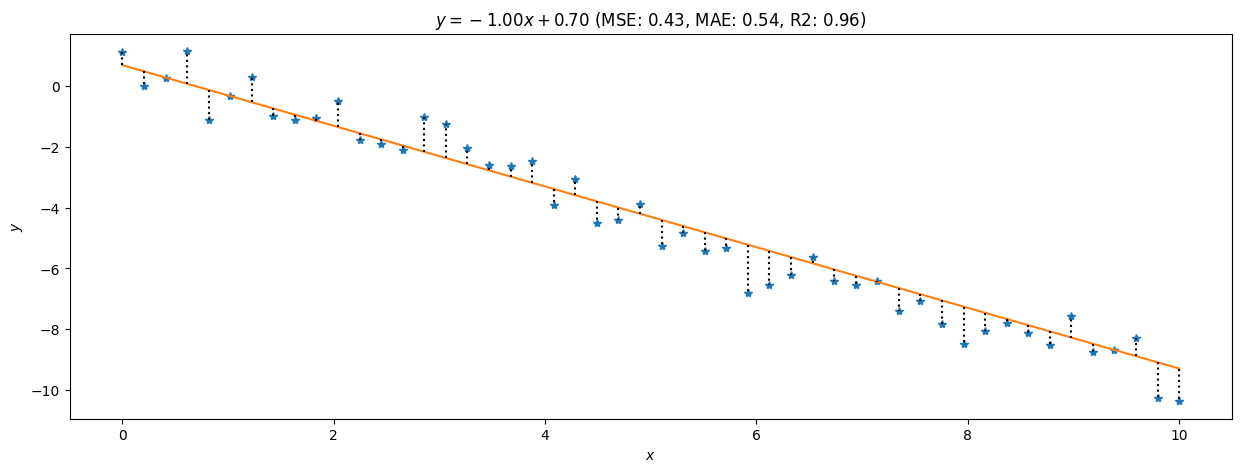

In [24]:
################################################################################
# The parameters of the linear model can be modified here.
w_e = -1
b_e = 0.7
################################################################################

plot_linear_model(x, y, w_e, b_e)

<div class="qst">

* What is the best $R^2$ score (it is shown on top of the plot; the higher the score the better the model is) that can be obtained?

    - 0.9-1

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998367)
</div>

## Quality of the Model

The following cells change the parameters of the model over a grid and compare the resulting models using the MSE, MAE and $R^2$.

In [25]:
x, y, w, b = generate_dataset_lr(seed)

n_points = 31
w_vec = np.linspace(-2, 2, n_points)
b_vec = np.linspace(-2, 2, n_points)

w_mat, b_mat = np.meshgrid(w_vec, b_vec, indexing="ij")
mses = np.zeros(w_mat.shape)
maes = np.zeros(w_mat.shape)
r2cs = np.zeros(w_mat.shape)

for i_w, w in enumerate(w_vec):
    for i_b, b in enumerate(b_vec):
        mses[i_w, i_b] = root_mean_squared_error(y, w * x + b) ** 2
        maes[i_w, i_b] = mean_absolute_error(y, w * x + b)
        r2cs[i_w, i_b] = r2_score(y, w * x + b)

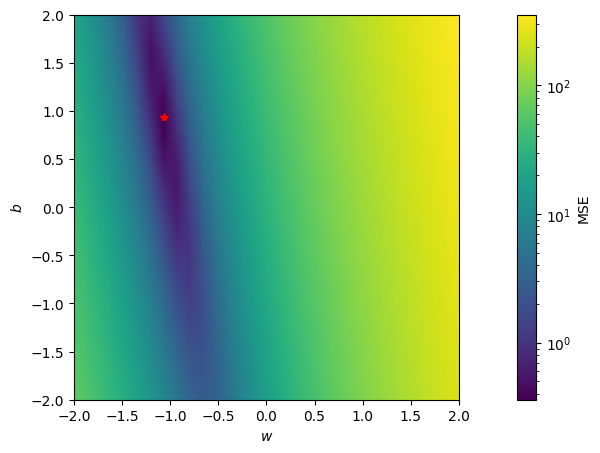

Minimum MSE: 0.36


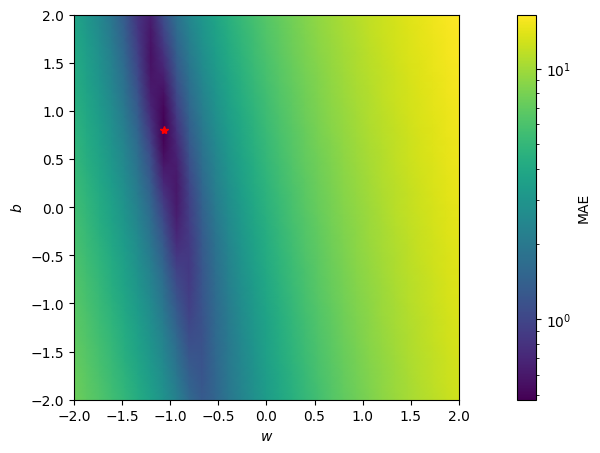

Minimum MAE: 0.48


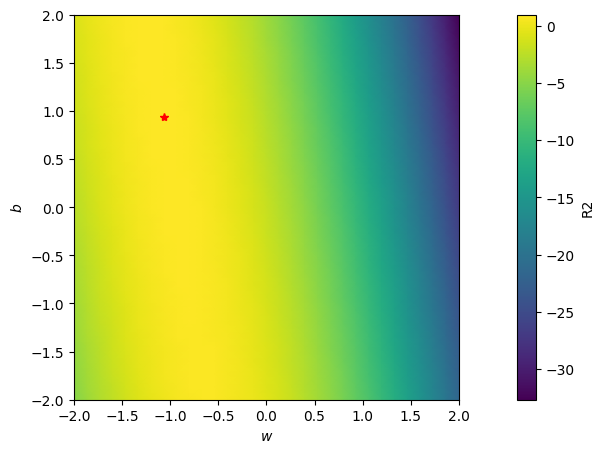

Maximum R2: 0.97


In [26]:
labels = ("MSE", "MAE", "R2")
for errors, label in zip((mses, maes, r2cs), labels):
    ind = np.unravel_index(np.argmin(errors), errors.shape)

    if label == "R2":
        ind = np.unravel_index(np.argmax(errors), errors.shape)
        plt.pcolormesh(w_mat, b_mat, errors, shading="gouraud")
    else:
        ind = np.unravel_index(np.argmin(errors), errors.shape)
        plt.pcolormesh(w_mat, b_mat, errors, norm=LogNorm(), shading="gouraud")

    w_opt = w_vec[ind[0]]
    b_opt = b_vec[ind[1]]

    plt.plot(w_opt, b_opt, "r*")
    plt.xlabel("$w$")
    plt.ylabel("$b$")
    plt.gca().set_aspect("equal", "box")
    plt.colorbar().ax.set_ylabel(label)
    plt.show()
    if label == "R2":
        print("Maximum {}: {:.2f}".format(label, errors.max()))
    else:
        print("Minimum {}: {:.2f}".format(label, errors.min()))

<div class="qst">

Los graficos anteriores representan un test de 31 valores de w, 31 valores de b y para cada valor tenemos un resultado. El mejor valor es la recta descendiente azul oscura que se obtiene.

* How many models have been evaluated?
    - 31² > Ya que tenemos 31 parámetros para w y 31 para b.

* Is this efficient, or even scalable?

→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998369)
</div>

## Optimization

The following function computes the Least Squares Line, returning the value of the slope and the intercept.

In [27]:
def least_squares_line(x, y):
    # Este codigo entrena un modelo lineal en una dimension
    ############################################################################
    # Compute the auxiliary elements.
    x_bar = x.mean()
    y_bar = y.mean()
    x_hat = x - x_bar
    y_hat = y - y_bar

    # Compute the optimal w and b.
    w = (x_hat @ y_hat) / (x_hat @ x_hat)
    b = y_bar - w * x_bar
    ############################################################################

    return w, b

<div class="qst inspect">

* Does the implementation coincide with the equations shown in the slides?

</div>

The following cell compares the true model with the estimated one.

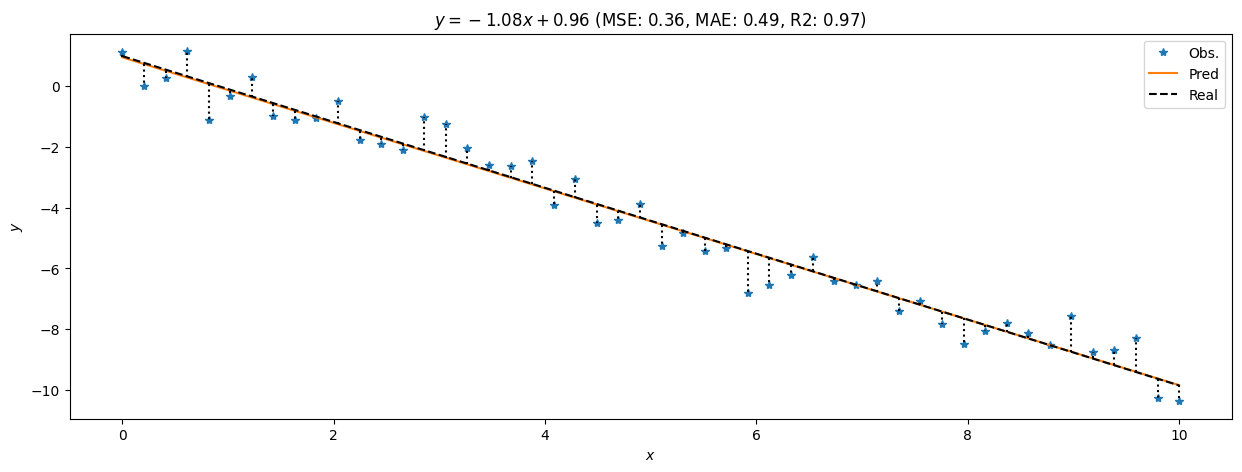

In [ ]:
# Ahora lo hacemos con los valores obtenidos en lugar de a fuerza bruta:
x, y, w, b = generate_dataset_lr(seed)

w_e, b_e = least_squares_line(x, y)
plot_linear_model(x, y, w_e, b_e, w_r=w, b_r=b)

A linear model can be trained using *scikit-learn*, in particular creating a model with `LinearRegression` and training it with the `fit` function.

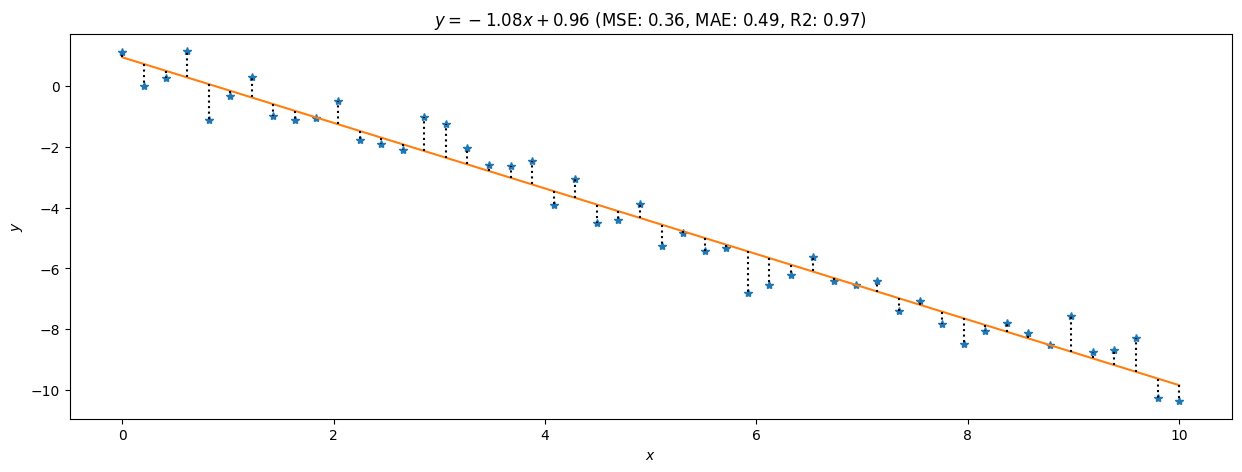

In [ ]:
# Lo anterior es la manera manual pero 
# En la practica vamos a usar sklearn con LinearRegresion y luego entreno el modelo con fit
################################################################################
# Create the model using LinearRegression.
model = LinearRegression(fit_intercept=True)
# Train the model using fit.
model.fit(x.reshape(-1, 1), y)
################################################################################

# sklearn es más potente y usa librerias en C
# Podemos acceder a los parametros porq los guarda de forma interna el modelo

# Extract the model parameters.
w = model.coef_[0]
b = model.intercept_

plot_linear_model(x, y, model.coef_[0], model.intercept_)

<div class="qst inspect">

* Is the resultant model equivalent to the one computed using the `least_squares_line` function?

</div>

# Multiple Linear Regression

## First Example

### Dataset

This code generates and plots the dataset.
The underlying (real) model behind the data is linear.

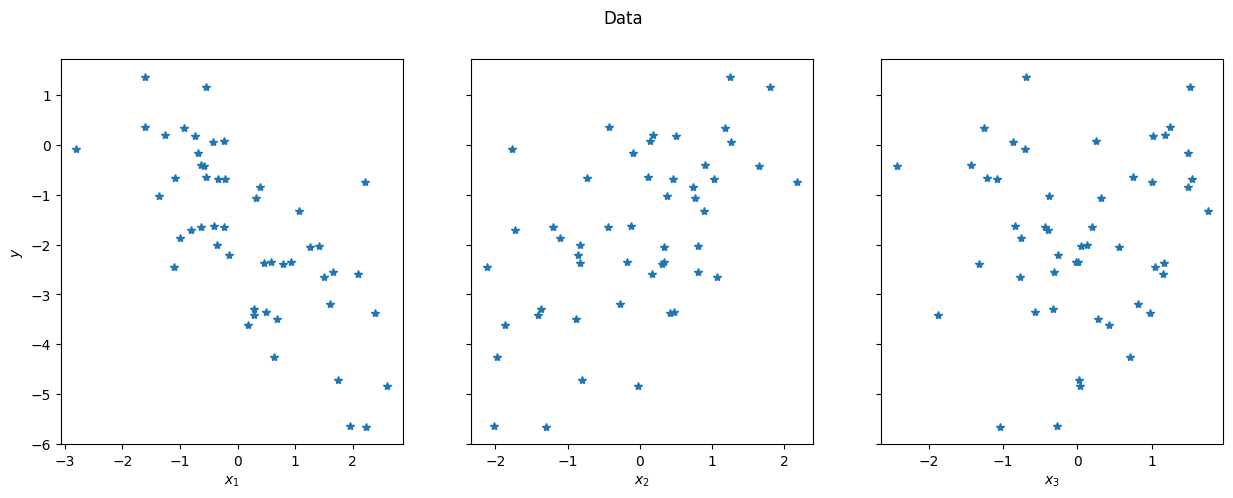

In [30]:
x, y, w, b = generate_dataset_lr_mv(seed)
plot_dataset(x, y)

<div class="qst">

* Can the linearity be distinguished also in the plot?

    - En el primero y segundo si, el tercero no, hay solo ruido.

</div>

### 1-Dimensional Linear Models

A first approach to a multidimensional problem is to reduce it to a 1-dimensional problem by retaining only one of the features.

<div class="qst inspect">

* Inspect the code below, which trains one model per feature.
* Which one is the best 1-dimensional model?
    - El x1 porq la R2 da el resultado más alto de 0.5 (50%) > no es un buen modelo, pero algo hace. El 30% de x2 esta peor y x3 es un 1% > un modelo aleatorio.
* Are they optimal models?
    - No 

  Is this a good approach?
    - Probablemente no
    
→ [Questionnaire](https://posgrado.uam.es/mod/quiz/view.php?id=998372)
</div>

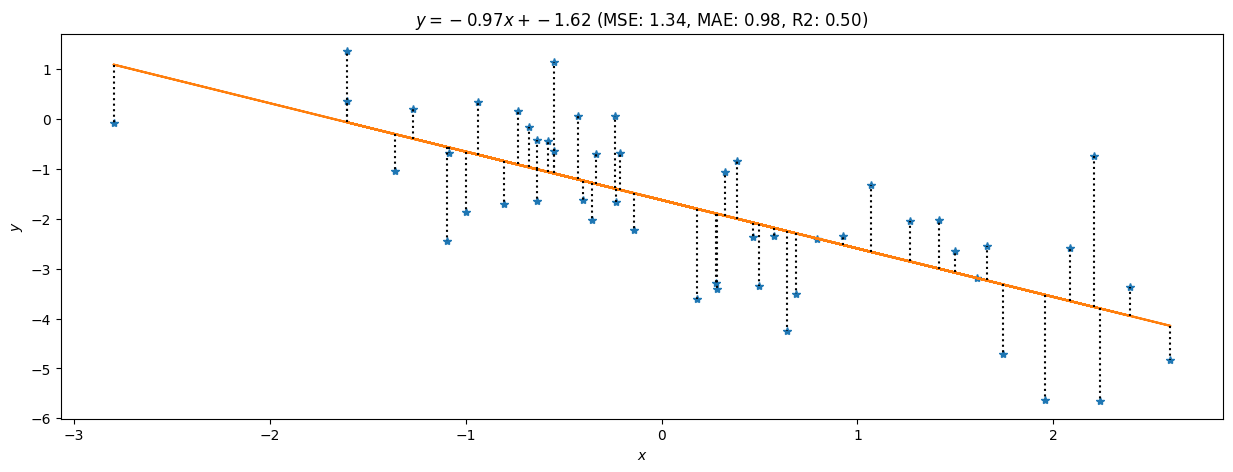

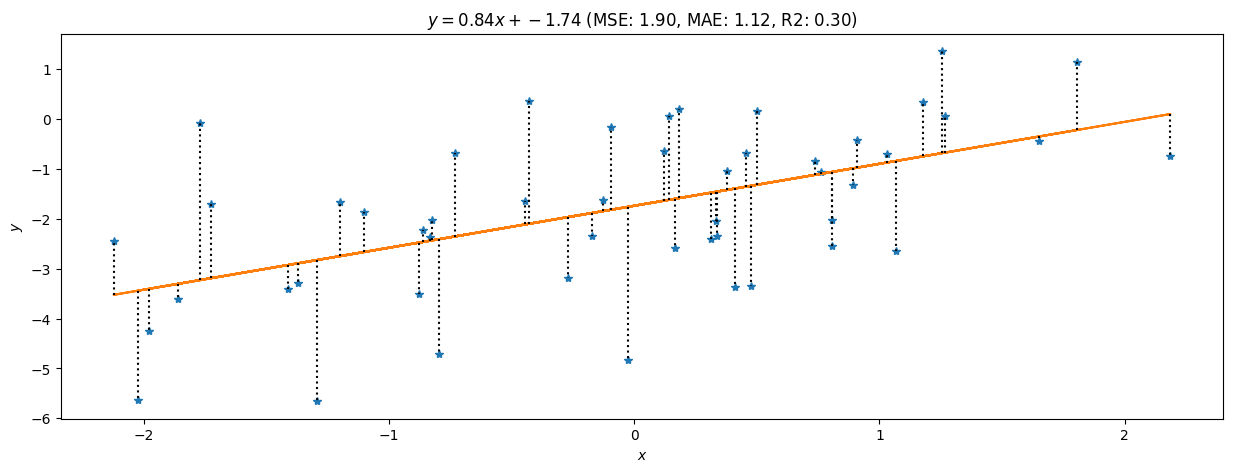

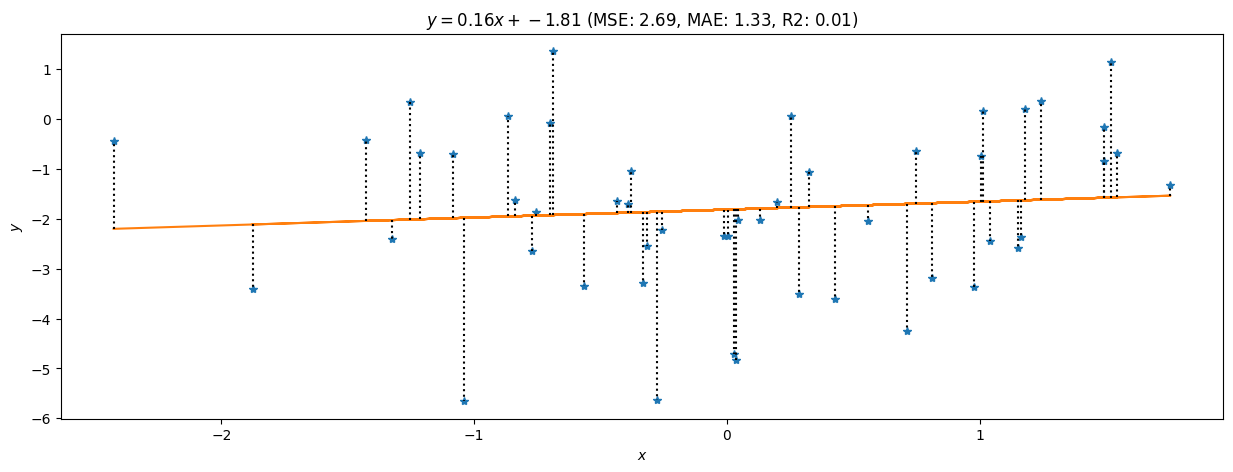

In [31]:
for i in range(x.shape[1]):
    xi = x[:, i].reshape(-1, 1)
    # Train a linear model over over feature i.
    ############################################################################
    model = LinearRegression(fit_intercept=True)
    model.fit(xi, y)
    ############################################################################

    w = model.coef_[0]
    b = model.intercept_

    plot_linear_model(xi, y, w, b)
    plt.show()

## Optimization

The following function computes the linear model, returning the normal vector and the intercept.

In [32]:
def multiple_linear_regression(x, y):
    # Build the extended data matrix.
    x_bar = np.column_stack((np.ones(x.shape[0]), x))
    # Compute the optimal w and b by multiplying the pseudo-inverse times y.
    w_bar = np.linalg.inv(x_bar.T @ x_bar) @ (x_bar.T @ y)
    # Extract w and b from the vector of extended weights.
    w = w_bar[1:]
    b = w_bar[0]

    return w, b

<div class="qst">

* Look carefully at the implementation.
  Does it coincide with the equation shown in the slides?

</div>

The following cell compares the true model with the estimated one.

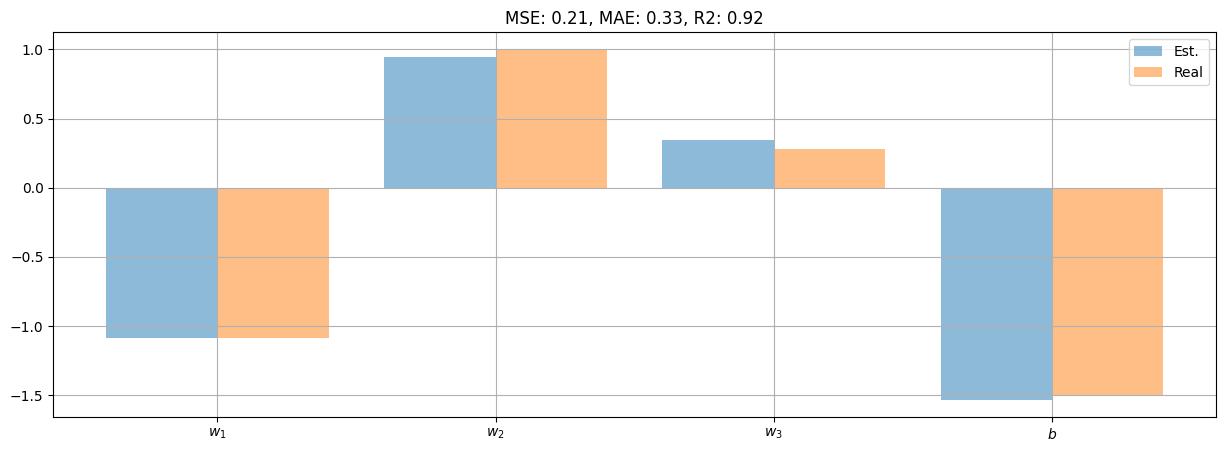

In [33]:
x, y, w, b = generate_dataset_lr_mv(seed)
w_e, b_e = multiple_linear_regression(x, y)
plot_linear_model(x, y, w_e, b_e, w_r=w, b_r=b)

The following cell trains a linear model using *scikit-learn*.

In [ ]:
# Create the model using LinearRegression.
model = LinearRegression(fit_intercept=True)
# Train the model using fit.
model.fit(x, y)
# Extract the model parameters.
w_e = model.coef_
b_e = model.intercept_

plot_linear_model(x, y, w_e, b_e, w_r=w, b_r=b)

<div class="qst">

* Is this model equivalent to the one computed using the `multiple_linear_regression` function?

</div>